> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: tmdb-movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Check the original shape of the data
df.shape

(10866, 21)

In [4]:
# Check the Dtype and the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Check the volume of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# drop cloums I don't need and with too many null values 
df.drop(['homepage','tagline','keywords','production_companies'],axis = 1,inplace = True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
#Double check the data shape 
df.shape

(10866, 17)

In [8]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
#drop the null value and double check there is no null value in data 
df.dropna(inplace = True)
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
# check if there are duplicates in dataset 
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
#Double check the shape make sure I don't loss too much data 
df.shape

(10724, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10724 non-null  int64  
 1   imdb_id         10724 non-null  object 
 2   popularity      10724 non-null  float64
 3   budget          10724 non-null  int64  
 4   revenue         10724 non-null  int64  
 5   original_title  10724 non-null  object 
 6   cast            10724 non-null  object 
 7   director        10724 non-null  object 
 8   overview        10724 non-null  object 
 9   runtime         10724 non-null  int64  
 10  genres          10724 non-null  object 
 11  release_date    10724 non-null  object 
 12  vote_count      10724 non-null  int64  
 13  vote_average    10724 non-null  float64
 14  release_year    10724 non-null  int64  
 15  budget_adj      10724 non-null  float64
 16  revenue_adj     10724 non-null  float64
dtypes: float64(4), int64(6), object

In [14]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [15]:
#Change dtype of genres from object to string
df['genres'].astype(str)

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10724, dtype: object

In [16]:
#Find the genres which contains '|'
df_genres = df[df['genres'].str.contains('|', regex=False)]

#Make a copy and split the data with '|'
df1 = df_genres.copy()
df1['genres'] = df1['genres'].apply(lambda x: x.split("|"))

#Apply explode function to each column of each dataframe copy
df1 = df1.explode('genres')

In [17]:
#Apply to_datetime function to get year form release_date
pd.to_datetime(df1['release_date'], errors='coerce').dt.year.astype(int)
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
#Release_year, genres and its accumulated popularity
df2 = df1.copy()
df2 = df2.groupby(['release_year', 'genres'])['popularity'].agg('sum').reset_index()
df2.tail(20)

,release_year,genres,popularity
1014,2014,Western,4.043682
1015,2015,Action,234.086892
1016,2015,Adventure,226.581261
1017,2015,Animation,43.890487
1018,2015,Comedy,125.310165
1019,2015,Crime,87.624047
1020,2015,Documentary,4.703738
1021,2015,Drama,208.370733
1022,2015,Family,60.237690
1023,2015,Fantasy,57.427532


In [19]:
#Apply groupby funtion and transform function to find the max value of popularity of the genres that year
#Answer the quetion which genres are most popular from year to year?
idx = df2.groupby(['release_year'])['popularity'].transform(max) == df2['popularity']
df3 = df2[idx].reset_index(drop=True)
df3

,release_year,genres,popularity
0,1960,Drama,6.951332
1,1961,Comedy,6.726763
2,1962,Drama,7.151725
3,1963,Thriller,7.199292
4,1964,Comedy,7.579267
5,1965,Drama,5.679655
6,1966,Comedy,5.091497
7,1967,Drama,7.968890
8,1968,Drama,6.886366
9,1969,Action,5.399760


In [20]:
#Find the most popular genre
df4 = df3.groupby('genres').popularity.count()
df4

genres
Action       10
Adventure     2
Comedy        9
Drama        30
Thriller      5
Name: popularity, dtype: int64

References:
https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [22]:
df6 = df.copy()[['revenue', 'id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']]
df6.head()

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
0,1513528810,135397,32.985763,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,378436354,76341,28.419936,150000000,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,295238201,262500,13.112507,110000000,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,1506249360,168259,9.335014,190000000,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


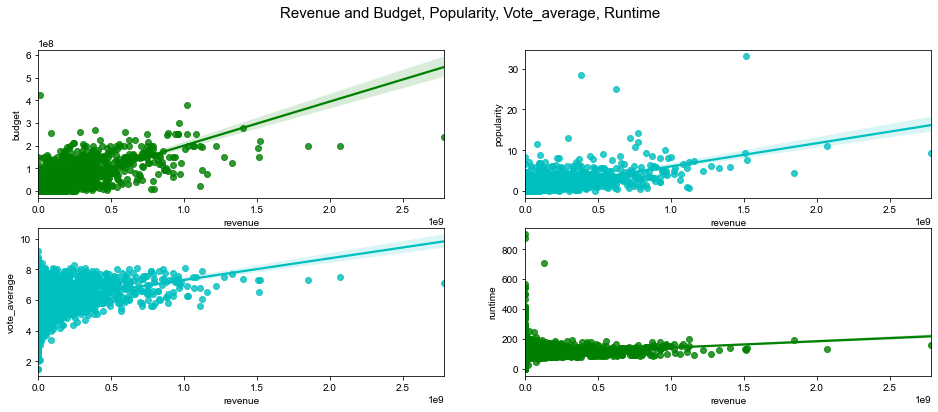

In [23]:
#Plot data and a linear regression model fit.
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue and Budget, Popularity, Vote_average, Runtime", fontsize = 15)
sns.regplot(x=df6['revenue'], y=df6['budget'],color='g',ax=axes[0][0])
sns.regplot(x=df6['revenue'], y=df6['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=df6['revenue'], y=df6['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=df6['revenue'], y=df6['runtime'],color='g',ax=axes[1][1])
sns.set_style("darkgrid")

In [24]:
#plot data with heatmap
def map_correlation( df ):
    corr = df.corr()
    fig , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 20 , as_cmap = True )
    hm = sns.heatmap(corr, cmap=cmap, square=True, ax=ax, annot = True)

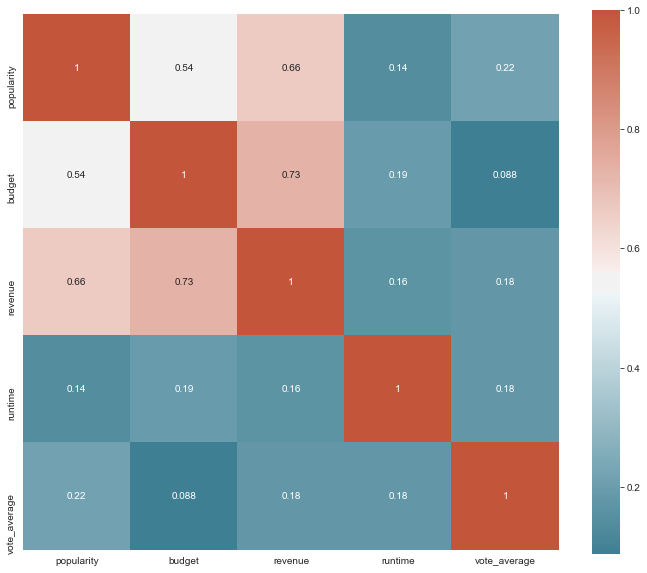

In [26]:
map_correlation(df6[['popularity','budget','revenue','runtime','vote_average']])

Revenue and Budget: corr_score = 0.73 According to linear regression model and heatmap , revenue and budget has a strong Correlation. Most likely higher revenue can generate higher revenue.

Revenue and Popularity: corr_score = 0.66 According to heatmap we can conclude that popularity and revenue has a relatively strong correlation while some data in linear regression model are opposite. So correlation between revenue and popularity is weaker than correlation bewteen revenue and budget.

Revenue and Runtime: corr_score = 0.16 Both linear regression model and heatmap shows Runtime is not highly related to the revenue. 

Revenue and Vote_average: corr_score = 0.18 Both linear regression model and heatmap shows vote_average is not highly related to the revenue. 

References:
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb
https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
https://seaborn.pydata.org/generated/seaborn.regplot.html
https://seaborn.pydata.org/generated/seaborn.set_style.html

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

1.Drama is the No.1 popular genre, action No.2, comedy No.3, thriller No.4, adventure No.5. Drama, Action and Comedy are three most-popular genres.

2.Revenue has a strong correlation with budget. Mostly, higher budget generates higher revenue. Popularity has a relatively weaker correlation compare to revenue. Some movies have a high popularity but did not make high revenue. 